In [ ]:
from google.colab import drive

drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


https://stackoverflow.com/questions/50331463/convert-rgba-to-rgb-in-python

white 배경

In [ ]:
import cv2 as cv
from google.colab.patches import cv2_imshow
import numpy as np
import os

def rgba2rgb( rgba, background=(255,255,255) ):
    row, col, ch = rgba.shape

    if ch == 3:
        return rgba

    assert ch == 4, 'RGBA image has 4 channels.'

    rgb = np.zeros( (row, col, 3), dtype='float32' )
    r, g, b, a = rgba[:,:,0], rgba[:,:,1], rgba[:,:,2], rgba[:,:,3]

    a = np.asarray( a, dtype='float32' ) / 255.0

    R, G, B = background

    rgb[:,:,0] = r * a + (1.0 - a) * R
    rgb[:,:,1] = g * a + (1.0 - a) * G
    rgb[:,:,2] = b * a + (1.0 - a) * B

    return np.asarray( rgb, dtype='uint8' )

groups_folder_path = '/content/gdrive/MyDrive/Study/collars_500x600/val/'

for label, names in enumerate(os.listdir(groups_folder_path)):
    # print(label, names)
    try:
        for image_file in os.listdir(groups_folder_path+names):
            # print(groups_folder_path+names+r'/'+image_file)
            img = cv.imread(groups_folder_path+names+r'/'+image_file, cv.IMREAD_UNCHANGED)
            img2 = rgba2rgb(img)
            cv.imwrite('/content/gdrive/MyDrive/Study/mask_collars_500x600/val/'+names+r'/'+image_file, img2)
    except Exception as e:
        print(str(e))
# img = cv.imread("/content/gdrive/MyDrive/Study/collars_500x600/train/straight/splash_Musinsa_1503.jpg.png", cv.IMREAD_UNCHANGED)
# cv2_imshow(img)

# img2 = rgba2rgb(img)
# cv2_imshow(img2)

could not broadcast input array from shape (265,190,3) into shape (140,190,3)
could not broadcast input array from shape (265,190,3) into shape (140,190,3)
could not broadcast input array from shape (265,190,3) into shape (140,190,3)


black 배경

In [ ]:
import cv2 as cv
from google.colab.patches import cv2_imshow
import numpy as np
import os

def rgba2rgb( rgba, background=(0,0,0) ):
    row, col, ch = rgba.shape

    if ch == 3:
        return rgba

    assert ch == 4, 'RGBA image has 4 channels.'

    rgb = np.zeros( (row, col, 3), dtype='float32' )
    r, g, b, a = rgba[:,:,0], rgba[:,:,1], rgba[:,:,2], rgba[:,:,3]

    a = np.asarray( a, dtype='float32' ) / 255.0

    R, G, B = background

    rgb[:,:,0] = r * a + (1.0 - a) * R
    rgb[:,:,1] = g * a + (1.0 - a) * G
    rgb[:,:,2] = b * a + (1.0 - a) * B

    return np.asarray( rgb, dtype='uint8' )

groups_folder_path = '/content/gdrive/MyDrive/Study/collars_500x600_crop/train/'

for label, names in enumerate(os.listdir(groups_folder_path)):
    # print(label, names)
    try:
        for image_file in os.listdir(groups_folder_path+names):
            # print(groups_folder_path+names+r'/'+image_file)
            img = cv.imread(groups_folder_path+names+r'/'+image_file, cv.IMREAD_UNCHANGED)
            img2 = rgba2rgb(img)
            cv.imwrite('/content/gdrive/MyDrive/Study/mask_collars_crop/train/'+names+r'/'+image_file, img2)
    except Exception as e:
        print(str(e))
# img = cv.imread("/content/gdrive/MyDrive/Study/collars_500x600/train/straight/splash_Musinsa_1503.jpg.png", cv.IMREAD_UNCHANGED)
# cv2_imshow(img)

# img2 = rgba2rgb(img)
# cv2_imshow(img2)

검은배경 200x200에 합성

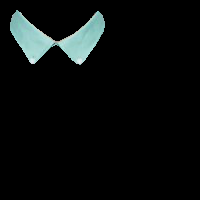

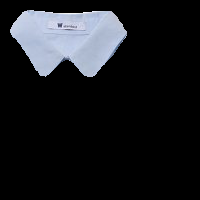

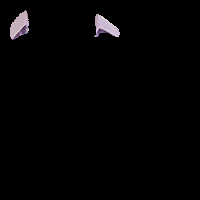

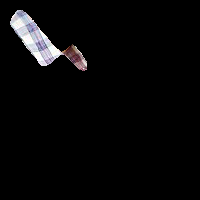

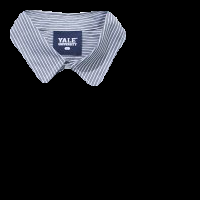

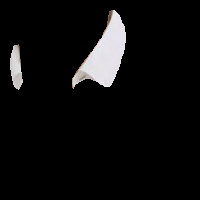

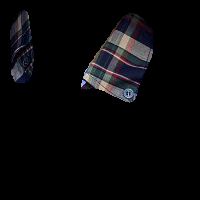

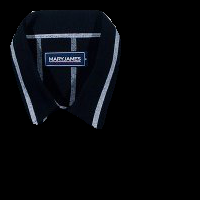

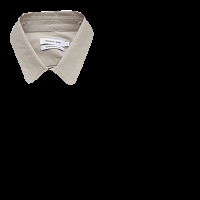

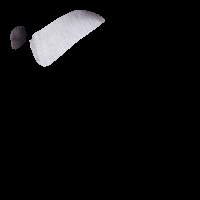

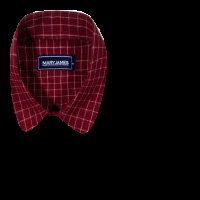

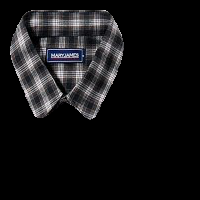

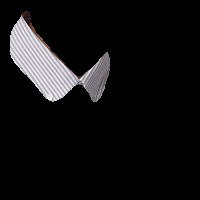

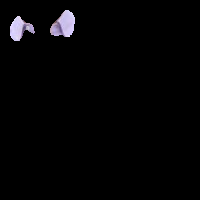

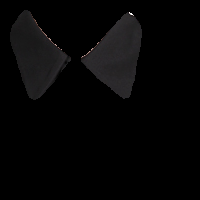

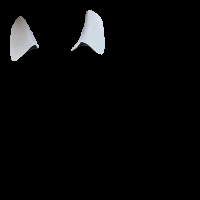

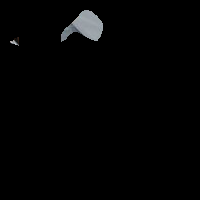

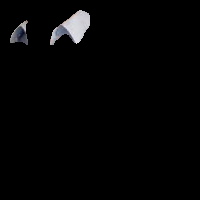

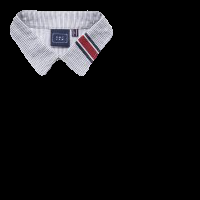

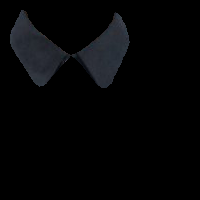

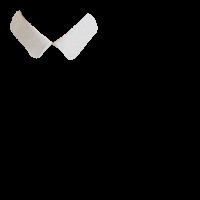

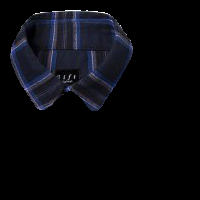

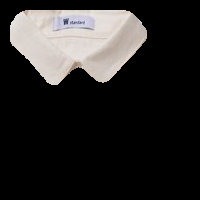

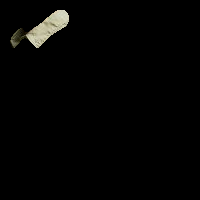

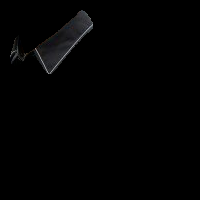

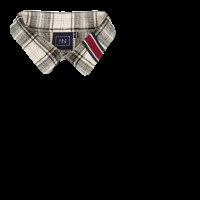

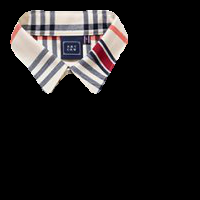

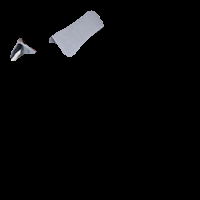

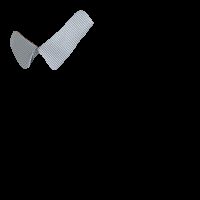

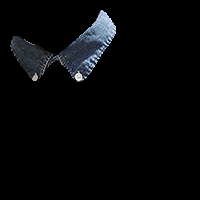

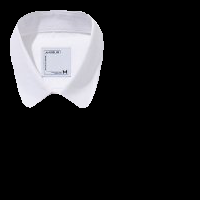

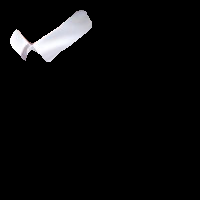

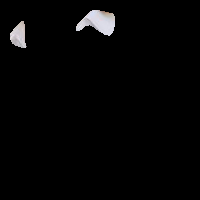

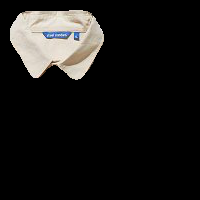

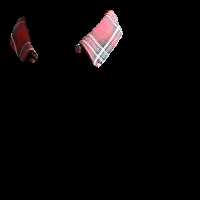

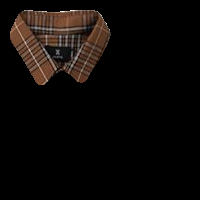

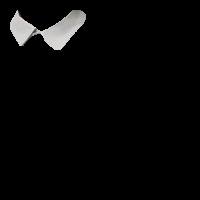

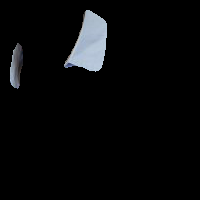

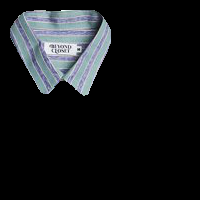

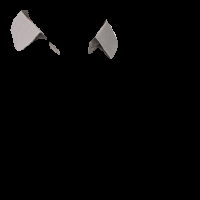

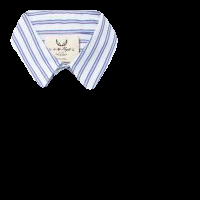

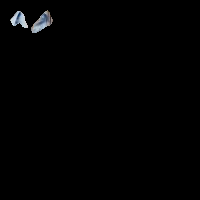

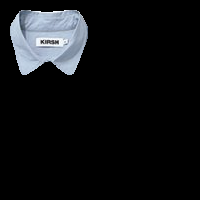

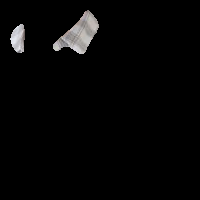

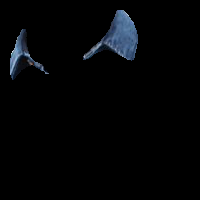

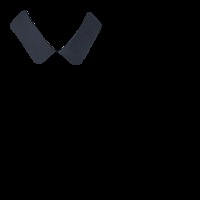

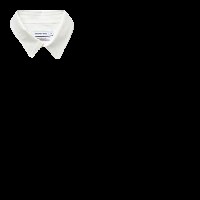

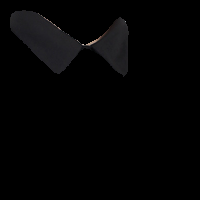

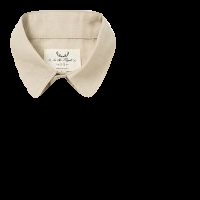

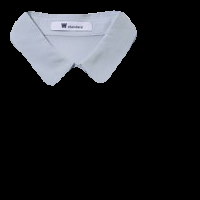

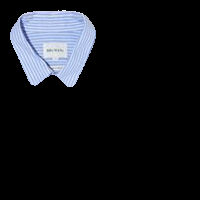

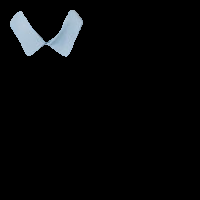

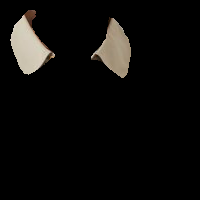

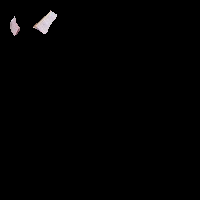

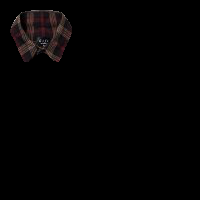

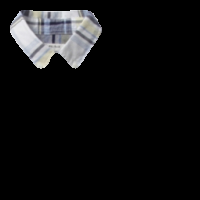

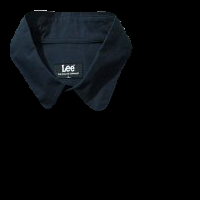

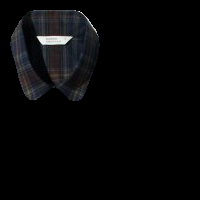

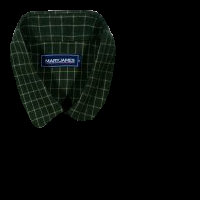

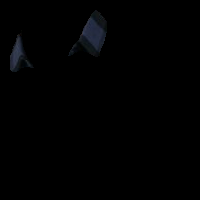

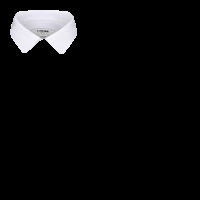

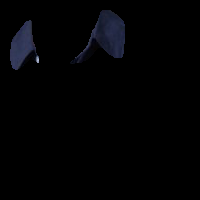

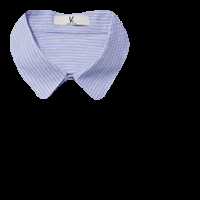

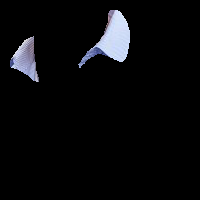

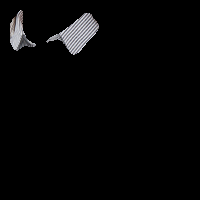

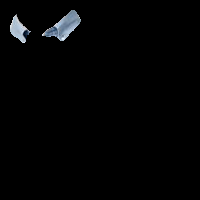

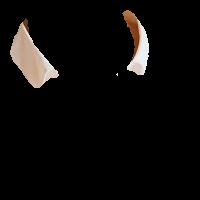

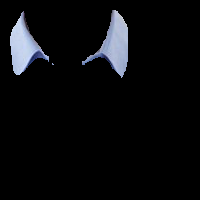

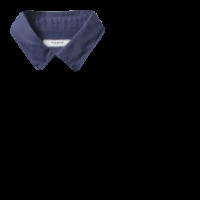

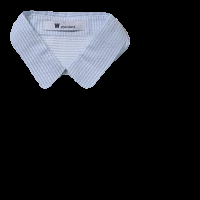

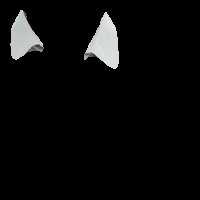

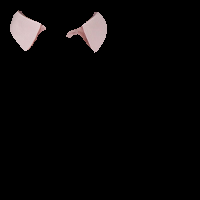

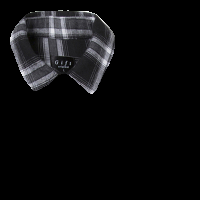

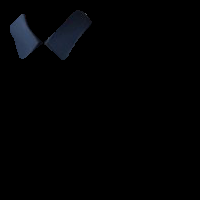

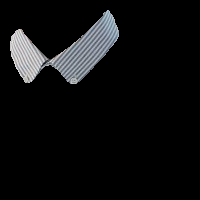

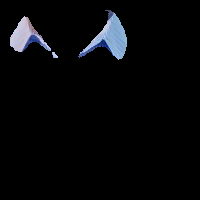

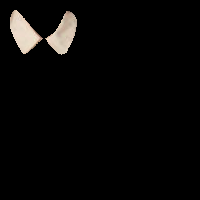

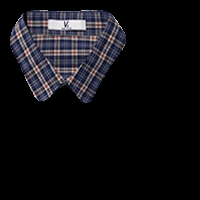

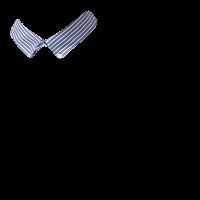

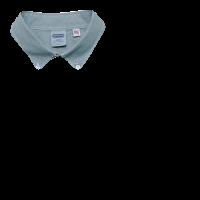

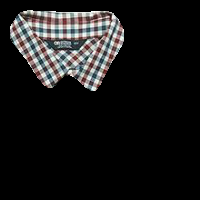

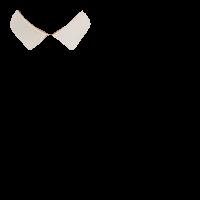

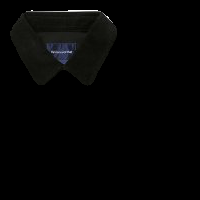

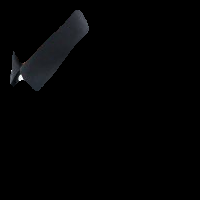

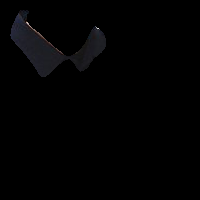

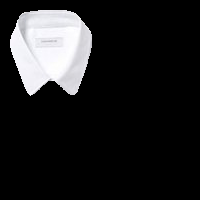

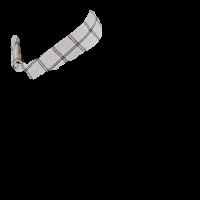

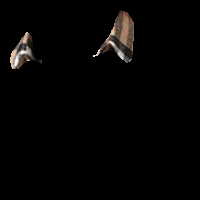

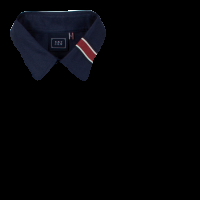

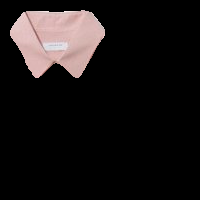

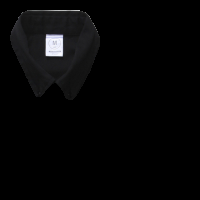

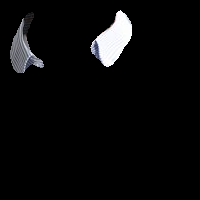

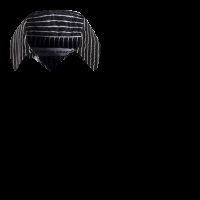

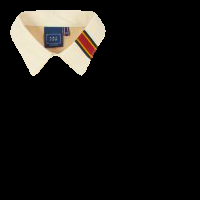

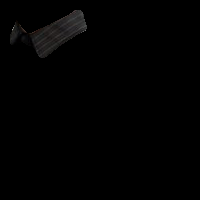

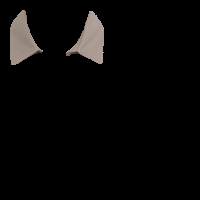

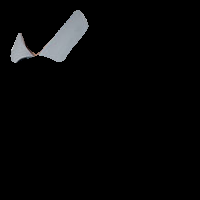

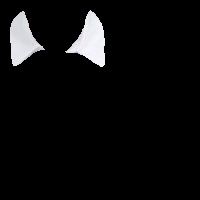

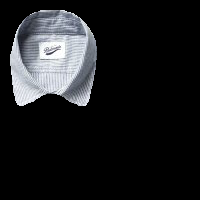

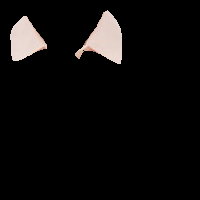

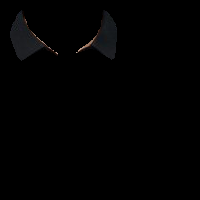

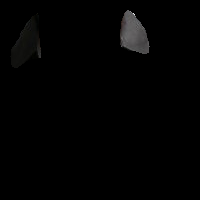

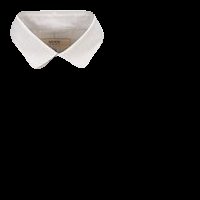

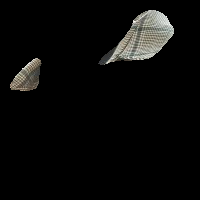

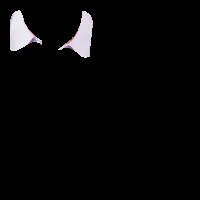

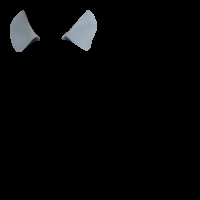

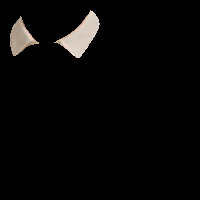

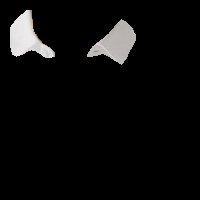

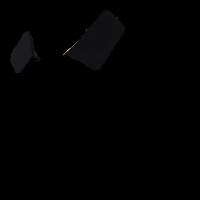

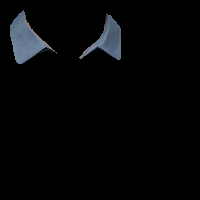

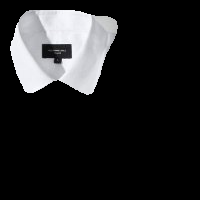

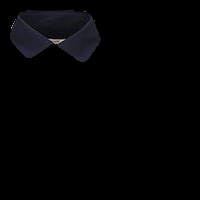

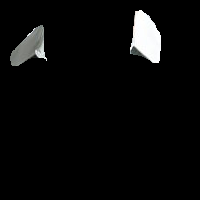

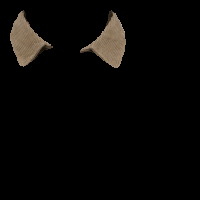

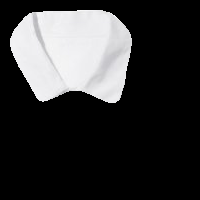

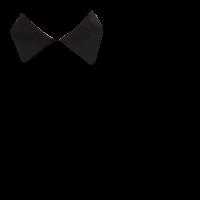

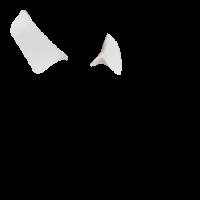

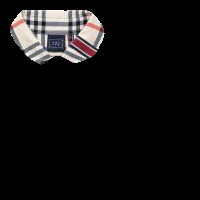

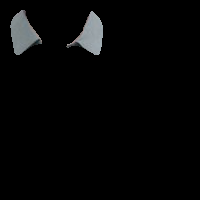

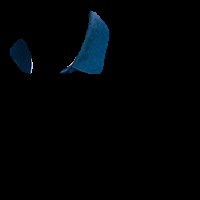

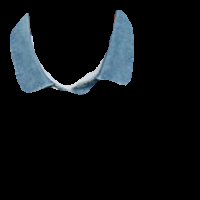

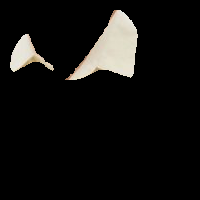

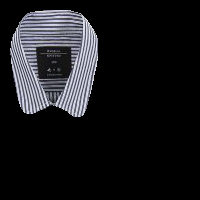

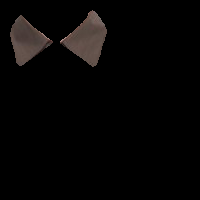

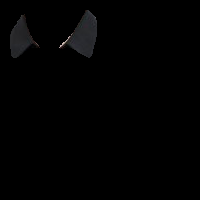

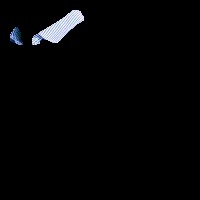

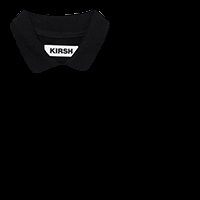

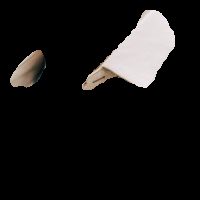

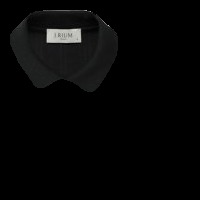

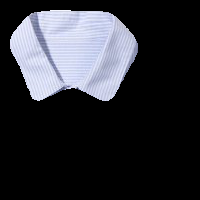

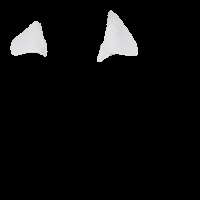

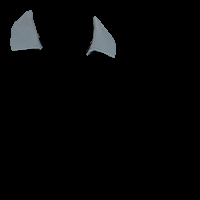

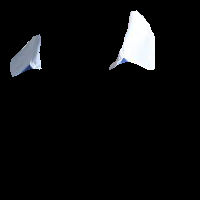

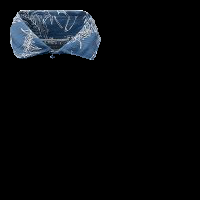

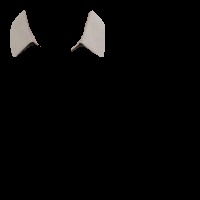

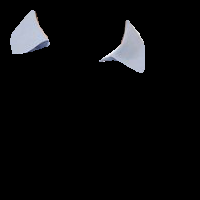

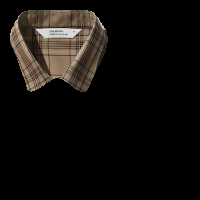

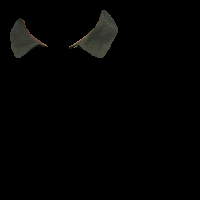

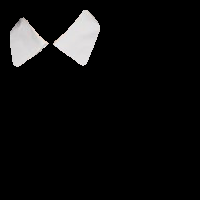

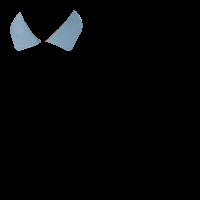

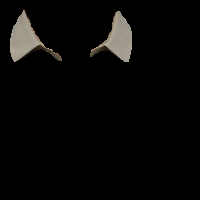

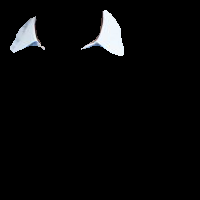

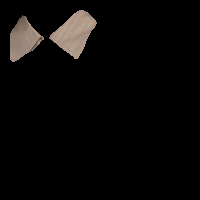

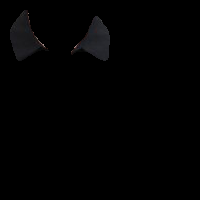

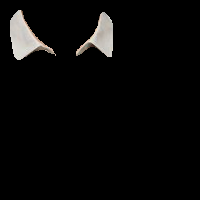

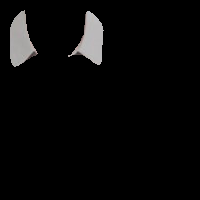

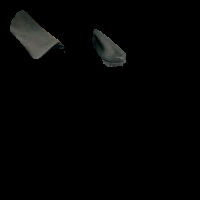

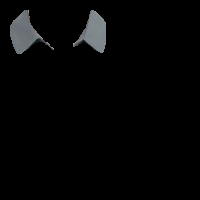

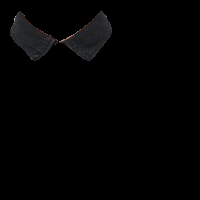

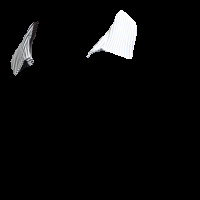

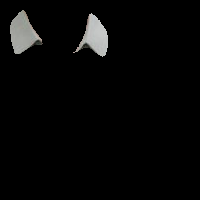

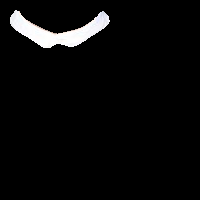

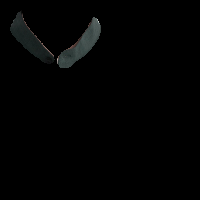

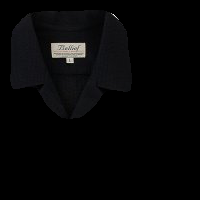

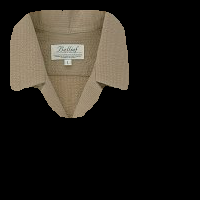

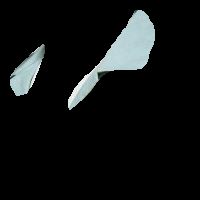

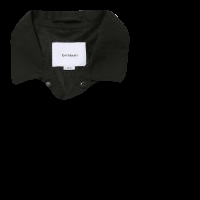

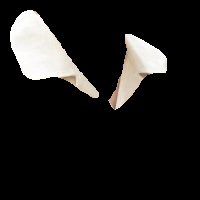

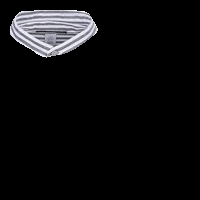

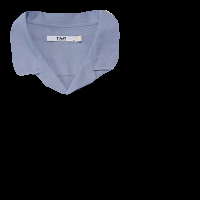

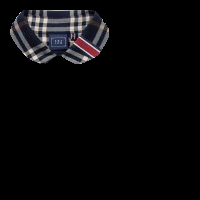

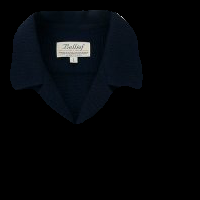

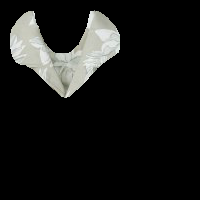

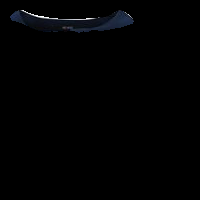

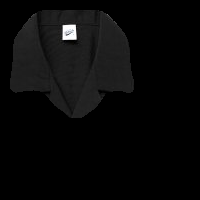

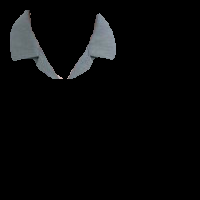

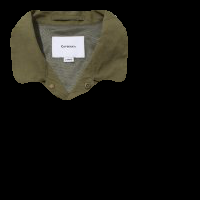

In [ ]:
import cv2 as cv
from google.colab.patches import cv2_imshow
import numpy as np
import os

groups_folder_path = '/content/gdrive/MyDrive/Study/mask_collars_crop/val/'

for label, names in enumerate(os.listdir(groups_folder_path)):
    # print(label, names)
    try:
        for image_file in os.listdir(groups_folder_path+names):
            # print(groups_folder_path+names+r'/'+image_file)
            image_toresize = cv2.imread(groups_folder_path+names+r'/'+image_file)    
            height, width = image_toresize.shape[:2]
            blank_image = np.zeros((200,200,3), np.uint8)
            blank_image[:,:] = (0,0,0)
            l_img = blank_image.copy()                    # (600, 900, 3)
            x_offset = y_offset = 10
            # Here, y_offset+height <= blank_image.shape[0] and x_offset+width <= blank_image.shape[1]
            l_img[y_offset:y_offset+height, x_offset:x_offset+width] = image_toresize.copy()
            cv2_imshow(l_img)
            cv.imwrite('/content/gdrive/MyDrive/Study/mask_collars_crop_200x200/val/'+names+r'/'+image_file, l_img)
    except Exception as e:
        print(str(e))